In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

# 엑셀 파일 불러오기
df = pd.read_excel('device_touches.xlsx')
df

,building,device_location,datetime,touches
0,교양학관,교양학관-1층,2022-01-01 00:01:39,90
1,교양학관,교양학관-1층,2022-01-01 00:15:03,138
2,교양학관,교양학관-1층,2022-01-01 00:15:43,85
3,교양학관,교양학관-1층,2022-01-01 00:41:33,176
4,교양학관,교양학관-1층,2022-01-01 01:11:01,182
...,...,...,...,...
39995,인문사회과학관,인문사회과학관-5층,2022-01-30 23:06:33,5
39996,인문사회과학관,인문사회과학관-5층,2022-01-30 23:27:07,34
39997,인문사회과학관,인문사회과학관-5층,2022-01-30 23:46:30,69
39998,인문사회과학관,인문사회과학관-5층,2022-01-30 23:48:13,99


In [2]:
# 날짜 데이터 전처리
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['date'] = pd.to_datetime(df['date'])

# device_location을 기준으로 기기별 터치 수 합계 계산
touch_count = df.groupby(['device_location', 'date']).sum()['touches'].reset_index()

# 열 이름 변경
touch_prophet = touch_count.rename(columns={'date': 'ds', 'touches': 'y'})

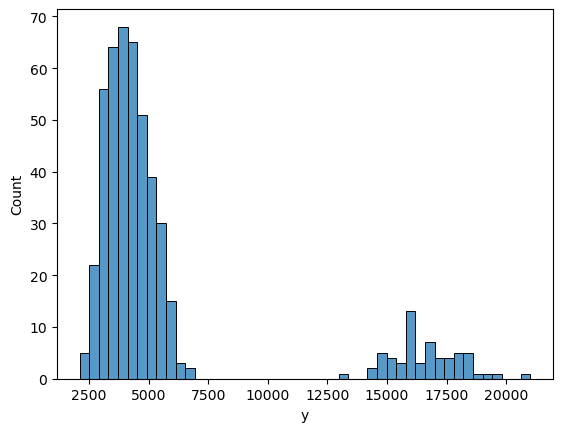

In [3]:
# 데이터 분포 시각화
sns.histplot(touch_prophet['y'])
plt.show()

In [4]:
touch_prophet['y'] = touch_prophet['y'].apply(lambda x: max(x, 1))
touch_prophet['y'] = np.log(touch_prophet['y'])

In [5]:
# Prophet 모델을 학습
touch_model = Prophet()
touch_model.fit(touch_prophet)

# 다음 달 기기별 터치 수 예측
future = touch_model.make_future_dataframe(periods=30)
forecast = touch_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

05:25:45 - cmdstanpy - INFO - Chain [1] start processing
05:25:45 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
55,2022-02-25,8.540989,7.906123,9.180106
56,2022-02-26,8.532085,7.857253,9.183714
57,2022-02-27,8.544949,7.903144,9.168225
58,2022-02-28,8.554464,7.925377,9.266691
59,2022-03-01,8.514432,7.869908,9.159105


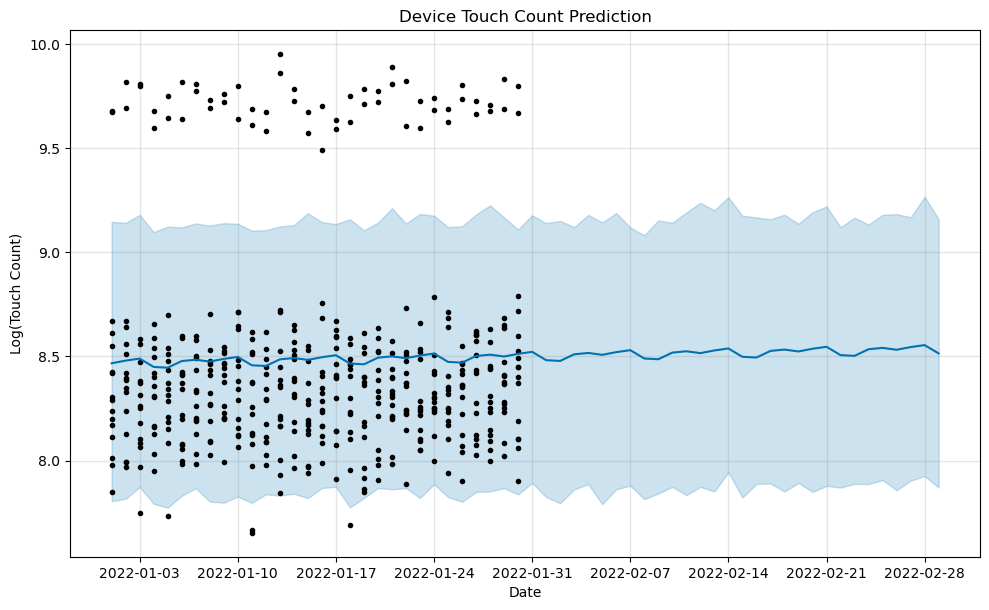

In [6]:
# 예측 결과 시각화
touch_model.plot(forecast, xlabel='Date', ylabel='Log(Touch Count)')
plt.title('Device Touch Count Prediction')
plt.show()

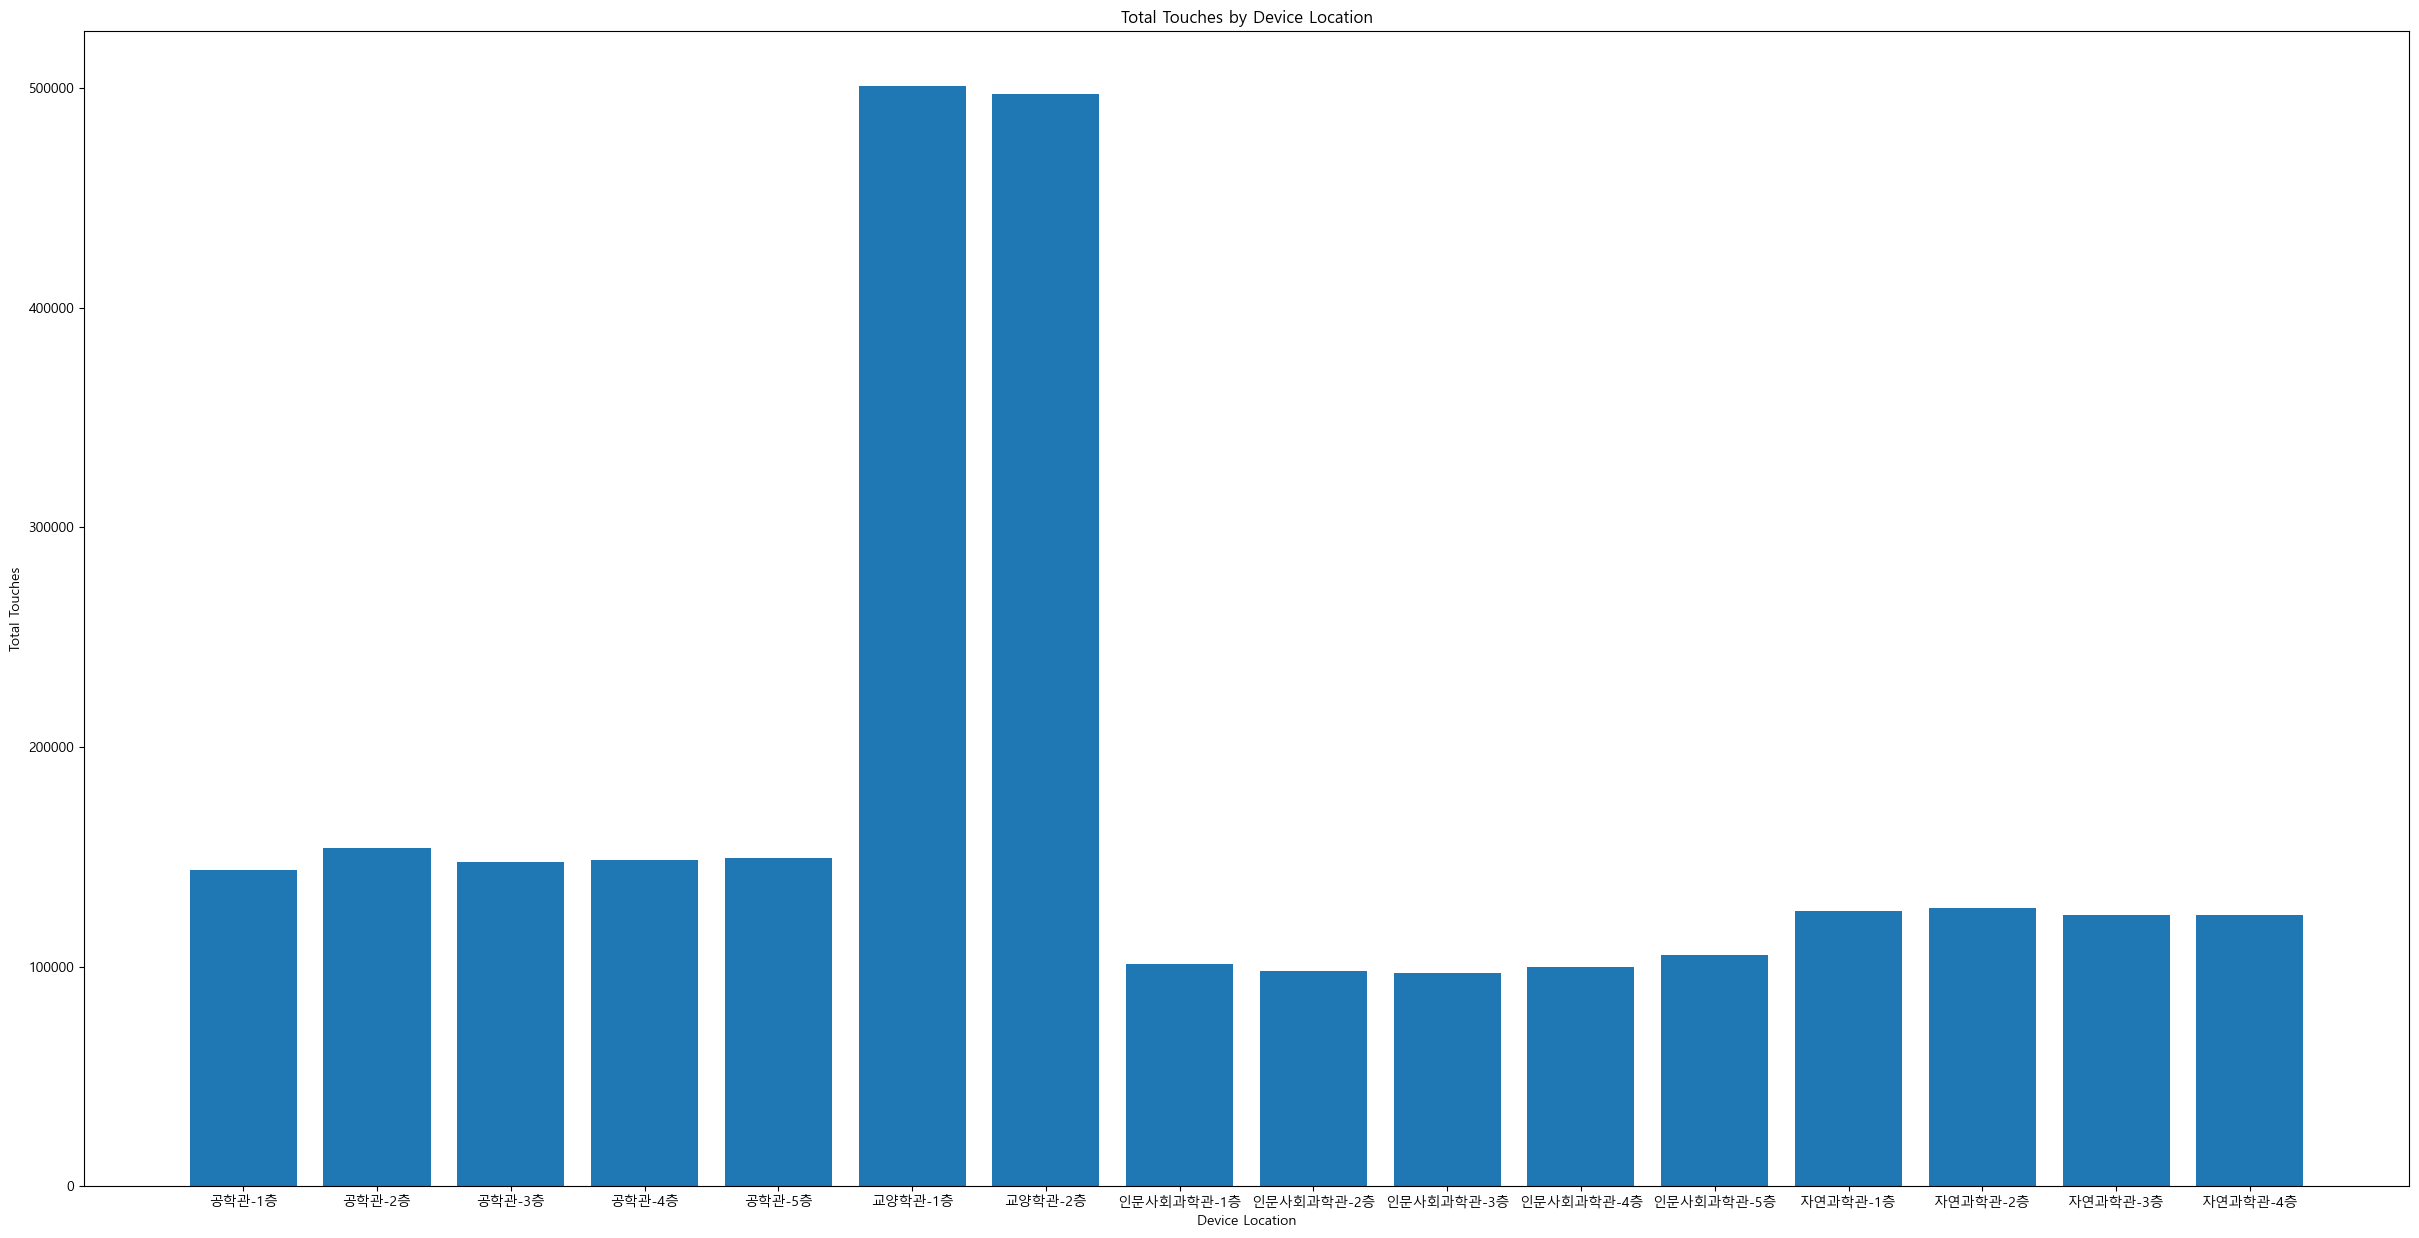

In [7]:
# 각 기기별 터치 수 계산
device_touches = df.groupby('device_location').sum()['touches'].reset_index()
device_touches.columns = ['device_location', 'total_touches']

# 각 기기별 터치 수 시각화
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots(figsize=(30, 15))
ax.bar(device_touches['device_location'], device_touches['total_touches'])
ax.set_xlabel('Device Location')
ax.set_ylabel('Total Touches')
ax.set_title('Total Touches by Device Location')
plt.show()